In [1]:
%load_ext autoreload
%autoreload 2
from scipy.stats import shapiro, ttest_rel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from hmpai.visualization import plot_performance

In [128]:
from hmpai.utilities import CHANNELS_2D
CHANNELS_2D.shape

(8, 5)

#### Normality test

In [2]:
accs = [
    0.9193548387096774,
    0.9121540312876053,
    0.9324644549763034,
    0.836627140974967,
    0.9248768472906403,
    0.8748466257668711,
    0.9042690815006468,
    0.9038238702201622,
    0.9471830985915493,
    0.879245283018868,
    0.9549436795994993,
    0.9286592865928659,
    0.8991793669402111,
    0.8837535014005602,
    0.9428223844282239,
    0.9404761904761905,
    0.9235436893203883,
    0.9288256227758007,
    0.9601449275362319,
    0.8938271604938272,
    0.933420365535248,
    0.925700365408039,
    0.9255813953488372,
    0.8993464052287582,
    0.889294403892944,
]

f1s = [
    0.9189590478638655,
    0.9025428860739405,
    0.9297394289290478,
    0.836697914316906,
    0.9241266291884175,
    0.8784285148394029,
    0.9057057119524584,
    0.8921159676082195,
    0.9426972513106886,
    0.8758293413566214,
    0.9549060528176925,
    0.9309728717346563,
    0.9012248386433083,
    0.8848582287889718,
    0.9392833456687871,
    0.9390455145945186,
    0.9198482926913684,
    0.9265422288805676,
    0.9598112263179928,
    0.8968477639025977,
    0.9320553452096181,
    0.9251131491025688,
    0.9240732870736009,
    0.8950677656979513,
    0.8878237386847555,
]

In [3]:
print(shapiro(accs))
print(shapiro(f1s))

ShapiroResult(statistic=0.958040177822113, pvalue=0.3768245577812195)
ShapiroResult(statistic=0.9596362709999084, pvalue=0.40727755427360535)


#### Normalization

In [2]:
norm_accs = []
norm_f1s = []

# norm_dummy
norm_accs.append(
    [
        0.9193548387096774,
        0.9121540312876053,
        0.9324644549763034,
        0.836627140974967,
        0.9248768472906403,
        0.8748466257668711,
        0.9042690815006468,
        0.9038238702201622,
        0.9471830985915493,
        0.879245283018868,
        0.9549436795994993,
        0.9286592865928659,
        0.8991793669402111,
        0.8837535014005602,
        0.9428223844282239,
        0.9404761904761905,
        0.9235436893203883,
        0.9288256227758007,
        0.9601449275362319,
        0.8938271604938272,
        0.933420365535248,
        0.925700365408039,
        0.9255813953488372,
        0.8993464052287582,
        0.889294403892944,
    ]
)
norm_f1s.append(
    [
        0.9189590478638655,
        0.9025428860739405,
        0.9297394289290478,
        0.836697914316906,
        0.9241266291884175,
        0.8784285148394029,
        0.9057057119524584,
        0.8921159676082195,
        0.9426972513106886,
        0.8758293413566214,
        0.9549060528176925,
        0.9309728717346563,
        0.9012248386433083,
        0.8848582287889718,
        0.9392833456687871,
        0.9390455145945186,
        0.9198482926913684,
        0.9265422288805676,
        0.9598112263179928,
        0.8968477639025977,
        0.9320553452096181,
        0.9251131491025688,
        0.9240732870736009,
        0.8950677656979513,
        0.8878237386847555,
    ]
)

# norm_0_to_1
norm_accs.append(
    [
        0.9366359447004609,
        0.9253910950661853,
        0.9016587677725119,
        0.8801054018445322,
        0.9421182266009852,
        0.905521472392638,
        0.890038809831824,
        0.9107763615295481,
        0.9730046948356808,
        0.8716981132075472,
        0.9499374217772215,
        0.923739237392374,
        0.9062133645955451,
        0.9159663865546218,
        0.9549878345498783,
        0.9619047619047619,
        0.9429611650485437,
        0.9323843416370107,
        0.9698067632850241,
        0.9382716049382716,
        0.9569190600522193,
        0.9269183922046285,
        0.9255813953488372,
        0.9281045751633987,
        0.9355231143552312,
    ]
)
norm_f1s.append(
    [
        0.9388138577179113,
        0.9215762706980462,
        0.8981059231558867,
        0.884737006464861,
        0.944838292409494,
        0.9105641839383976,
        0.8901215000207987,
        0.9044797537452703,
        0.9719041756480473,
        0.8677145290728262,
        0.950135653534734,
        0.9281297733507425,
        0.9100076302028193,
        0.9172604968101006,
        0.9556017208506077,
        0.9607118451666221,
        0.9435964349717182,
        0.9311366687539809,
        0.9695541013663018,
        0.9415732820059036,
        0.9543689821416572,
        0.9260994663591344,
        0.9202227583391351,
        0.9273401018395818,
        0.9355618456120685,
    ]
)

# norm_min1_to_1
norm_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)

norm_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)

# norm_zscore
norm_accs.append(
    [
        0.9262672811059908,
        0.9229843561973526,
        0.9478672985781991,
        0.8959156785243741,
        0.9470443349753694,
        0.905521472392638,
        0.9301423027166882,
        0.9073001158748552,
        0.9671361502347418,
        0.909433962264151,
        0.9586983729662077,
        0.939729397293973,
        0.9155920281359906,
        0.9103641456582633,
        0.9574209245742092,
        0.955952380952381,
        0.9453883495145631,
        0.9513641755634639,
        0.9818840579710145,
        0.9308641975308642,
        0.9477806788511749,
        0.9390986601705238,
        0.9255813953488372,
        0.9071895424836601,
        0.9184914841849149,
    ]
)
norm_f1s.append(
    [
        0.9262672811059908,
        0.9229843561973526,
        0.9478672985781991,
        0.8959156785243741,
        0.9470443349753694,
        0.905521472392638,
        0.9301423027166882,
        0.9073001158748552,
        0.9671361502347418,
        0.909433962264151,
        0.9586983729662077,
        0.939729397293973,
        0.9155920281359906,
        0.9103641456582633,
        0.9574209245742092,
        0.955952380952381,
        0.9453883495145631,
        0.9513641755634639,
        0.9818840579710145,
        0.9308641975308642,
        0.9477806788511749,
        0.9390986601705238,
        0.9255813953488372,
        0.9071895424836601,
        0.9184914841849149,
    ]
)

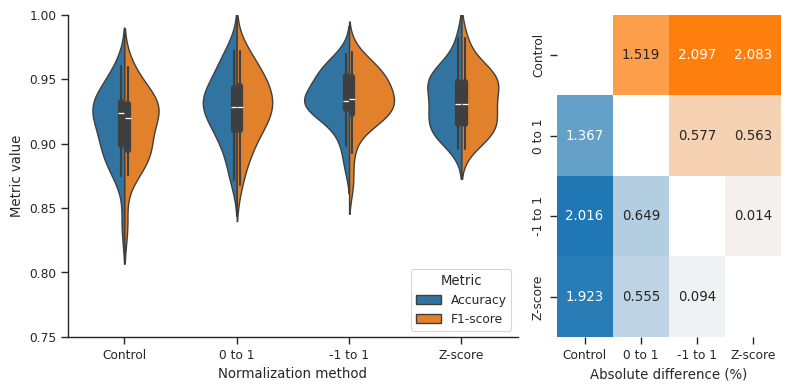

In [106]:
df = plot_performance(
    norm_accs,
    norm_f1s,
    ["Control", "0 to 1", "-1 to 1", "Z-score"],
    "Normalization method",
)

#### Preprocessing

In [74]:
pre_accs = []
pre_f1s = []

pre_categories = ["Control", "Unprocessed"]

# Control (processed)
pre_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)

pre_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)

# Unprocessed
pre_accs.append(
    [
        0.9354838709677419,
        0.9290012033694344,
        0.9561611374407583,
        0.9090909090909091,
        0.9273399014778325,
        0.912883435582822,
        0.963777490297542,
        0.9107763615295481,
        0.9636150234741784,
        0.9056603773584906,
        0.9649561952440551,
        0.9606396063960639,
        0.9003516998827668,
        0.9117647058823529,
        0.9720194647201946,
        0.9630952380952381,
        0.9466019417475728,
        0.9454329774614472,
        0.9782608695652174,
        0.9543209876543209,
        0.9712793733681462,
        0.925700365408039,
        0.9011627906976745,
        0.930718954248366,
        0.9343065693430657,
    ]
)

pre_f1s.append(
    [
        0.9378124790852738,
        0.9239112499743962,
        0.9550049415536099,
        0.9091232165016475,
        0.930245241395086,
        0.9176586157622648,
        0.9650092895343624,
        0.9022705721137353,
        0.9587673626707531,
        0.9052853743476547,
        0.9644559882938261,
        0.9627964113629446,
        0.90309624552674,
        0.9113146767590609,
        0.9707325725326811,
        0.9620252321133842,
        0.9477816312533973,
        0.9463028008376781,
        0.9793240178405274,
        0.9559969797445007,
        0.9706248784844099,
        0.9235905741739427,
        0.9000808269411845,
        0.9325700369248379,
        0.9341090517191237,
    ]
)

      category    metric     value
0      Control  Accuracy  0.934737
1  Unprocessed  Accuracy  0.938976
2      Control  F1-score  0.933941
3  Unprocessed  F1-score  0.938796


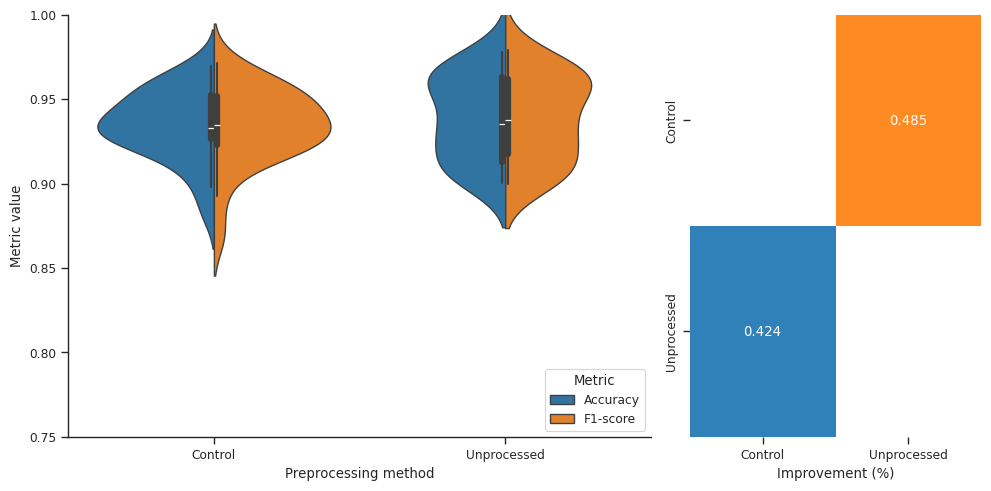

In [137]:
plot_performance(pre_accs, pre_f1s, pre_categories, "Preprocessing method")

#### Sampling frequency

In [109]:
sf_accs = []
sf_f1s = []
sf_categories = ["CNN-100", "CNN-500", "GRU-100", "GRU-500"]

# cnn 100
sf_accs.append(
    [
        0.8778173190984578,
        0.8505747126436781,
        0.8903614457831325,
        0.8361858190709046,
        0.901863354037267,
        0.8866103739445115,
        0.8556566970091027,
        0.8702830188679245,
        0.9361948955916474,
        0.8529769137302552,
        0.9105793450881612,
        0.8856088560885609,
        0.8545034642032333,
        0.8515850144092219,
        0.9140811455847255,
        0.9425901201602136,
        0.8436317780580076,
        0.871007371007371,
        0.9305177111716622,
        0.8982412060301508,
        0.9089790897908979,
        0.8913043478260869,
        0.8978562421185372,
        0.8143236074270557,
        0.8844282238442822,
    ]
)

sf_f1s.append(
    [
        0.8835294042582295,
        0.8434259576764486,
        0.8865009361666598,
        0.8396814694829328,
        0.9076672360976128,
        0.8938892497521496,
        0.8580407259180951,
        0.8613641027901272,
        0.9329667870669637,
        0.8518887179778225,
        0.9145815607244477,
        0.8870741851346942,
        0.8616304079348331,
        0.8552383825812481,
        0.9137691046509782,
        0.9430870537887216,
        0.8442752153426527,
        0.8708750075153233,
        0.9306251491431011,
        0.9000594562269637,
        0.907752201485518,
        0.891211745564416,
        0.8988642441050463,
        0.8240510991480738,
        0.885644096082576,
    ]
)

# cnn 500
sf_accs.append(
    [
        0.9216589861751152,
        0.8808664259927798,
        0.9075829383886256,
        0.8801054018445322,
        0.9236453201970444,
        0.8846625766871166,
        0.9055627425614489,
        0.8899188876013905,
        0.9553990610328639,
        0.8981132075471698,
        0.9474342928660826,
        0.9015990159901599,
        0.9073856975381008,
        0.9047619047619048,
        0.948905109489051,
        0.9238095238095239,
        0.8944174757281553,
        0.9074733096085409,
        0.9444444444444444,
        0.9098765432098765,
        0.9543080939947781,
        0.8989037758830695,
        0.9,
        0.8888888888888888,
        0.8990267639902676,
    ]
)
sf_f1s.append(
    [
        0.9225178901171512,
        0.8734550143551567,
        0.9004143684634609,
        0.8784079821724742,
        0.9263169057093907,
        0.8892612926678604,
        0.9028149468922129,
        0.8792682570679474,
        0.95133506997518,
        0.8967016103527513,
        0.9458426853383972,
        0.9016775636198426,
        0.9081153743827037,
        0.9015676970144014,
        0.947394630975861,
        0.9195878576044784,
        0.8912216176895444,
        0.9056589241542401,
        0.9414409042346297,
        0.9087975901560025,
        0.9523184408210428,
        0.9000719846635146,
        0.8971648392256316,
        0.8867887972619666,
        0.8982777022221147,
    ]
)

# gru 100
sf_accs.append(
    [
        0.8849347568208779,
        0.8569604086845466,
        0.9108433734939759,
        0.8251833740831296,
        0.901863354037267,
        0.8757539203860072,
        0.8439531859557867,
        0.8608490566037735,
        0.9245939675174014,
        0.8869987849331713,
        0.9181360201511335,
        0.9298892988929889,
        0.8498845265588915,
        0.8587896253602305,
        0.9176610978520287,
        0.9332443257676902,
        0.8915510718789408,
        0.9017199017199017,
        0.9359673024523161,
        0.9271356783919598,
        0.9175891758917589,
        0.8961352657004831,
        0.8953341740226987,
        0.8607427055702918,
        0.8941605839416058,
    ]
)

sf_f1s.append(
    [
        0.8924990050020559,
        0.8505354966222937,
        0.9100565835677958,
        0.8290995534059272,
        0.9048583815193949,
        0.8828986471885989,
        0.8451520388956398,
        0.8515605182305119,
        0.922556843553753,
        0.8879908119817623,
        0.9223143860128706,
        0.9326764702636918,
        0.8586057304207205,
        0.8632530011831305,
        0.9164850539857771,
        0.932663282270471,
        0.8951629549138154,
        0.9077748086232027,
        0.9363798505043557,
        0.9294770713837558,
        0.9197052524054221,
        0.8986464690361633,
        0.896542977569599,
        0.8647955627311337,
        0.8938593060604447,
    ]
)

# gru 500
sf_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)
sf_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)

  category    metric     value
0  CNN-100  Accuracy  0.882310
1  CNN-500  Accuracy  0.911150
2  GRU-100  Accuracy  0.891995
3  GRU-500  Accuracy  0.934737
4  CNN-100  F1-score  0.883508
5  CNN-500  F1-score  0.909057
6  GRU-100  F1-score  0.893822
7  GRU-500  F1-score  0.933941


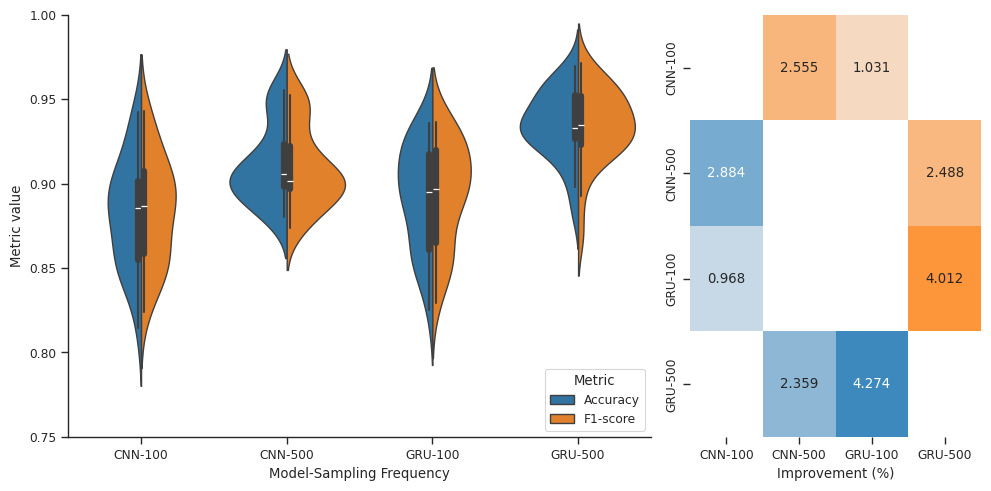

In [136]:
plot_performance(sf_accs, sf_f1s, sf_categories, "Model-Sampling Frequency")

#### Formulation

In [116]:
form_accs = []
form_f1s = []

form_categories = ["Control", "Topological", "Topological+Conv"]

# Base
form_accs.append([0.8778173190984578, 0.8505747126436781, 0.8903614457831325, 0.8361858190709046, 0.901863354037267, 0.8866103739445115, 0.8556566970091027, 0.8702830188679245, 0.9361948955916474, 0.8529769137302552, 0.9105793450881612, 0.8856088560885609, 0.8545034642032333, 0.8515850144092219, 0.9140811455847255, 0.9425901201602136, 0.8436317780580076, 0.871007371007371, 0.9305177111716622, 0.8982412060301508, 0.9089790897908979, 0.8913043478260869, 0.8978562421185372, 0.8143236074270557, 0.8844282238442822]
)

form_f1s.append([0.8835294042582295, 0.8434259576764486, 0.8865009361666598, 0.8396814694829328, 0.9076672360976128, 0.8938892497521496, 0.8580407259180951, 0.8613641027901272, 0.9329667870669637, 0.8518887179778225, 0.9145815607244477, 0.8870741851346942, 0.8616304079348331, 0.8552383825812481, 0.9137691046509782, 0.9430870537887216, 0.8442752153426527, 0.8708750075153233, 0.9306251491431011, 0.9000594562269637, 0.907752201485518, 0.891211745564416, 0.8988642441050463, 0.8240510991480738, 0.885644096082576]
)

# Topological model without topological conv
form_accs.append([0.8730723606168446, 0.8467432950191571, 0.8819277108433735, 0.8276283618581907, 0.8993788819875776, 0.8576598311218335, 0.8699609882964889, 0.8632075471698113, 0.9303944315545244, 0.8602673147023087, 0.9181360201511335, 0.8929889298892989, 0.8533487297921478, 0.8328530259365994, 0.9128878281622912, 0.9506008010680908, 0.8461538461538461, 0.8796068796068796, 0.94141689373297, 0.9183417085427136, 0.915129151291513, 0.8985507246376812, 0.8991172761664565, 0.8209549071618037, 0.8722627737226277]
)

form_f1s.append([0.8752059187277699, 0.8368104288125229, 0.878042552934993, 0.8313430737090247, 0.9040226665027232, 0.8650495227726722, 0.8700460248859507, 0.8540202058360524, 0.928218576912121, 0.8629758777724792, 0.9212666424038432, 0.894872717346528, 0.8614848861298086, 0.8354121977309392, 0.9118292347476198, 0.9511990803091033, 0.8477848529680088, 0.8840086744791755, 0.9413983827103791, 0.9185811715239087, 0.9170975258857027, 0.89703304547013, 0.9008274156191616, 0.8271030262889946, 0.8725946189148631]
)

# Topological model with topological conv
form_accs.append([0.8529062870699882, 0.8045977011494253, 0.8746987951807229, 0.80440097799511, 0.901863354037267, 0.8685162846803377, 0.8192457737321196, 0.8561320754716981, 0.9164733178654292, 0.8493317132442284, 0.8954659949622166, 0.9028290282902829, 0.8441108545034642, 0.792507204610951, 0.9152744630071599, 0.9279038718291055, 0.819672131147541, 0.8869778869778869, 0.9128065395095368, 0.8919597989949749, 0.8929889298892989, 0.8864734299516909, 0.8738965952080706, 0.8037135278514589, 0.8637469586374696]
)

form_f1s.append([0.8572699060987196, 0.7924727725167623, 0.8745469120466929, 0.8117391466698638, 0.9067120705977458, 0.8754482489128392, 0.8213153750182958, 0.8515519393480158, 0.9166380668732813, 0.8493807816606601, 0.8982151516897364, 0.9039070627201038, 0.8537635642098117, 0.7902288763532856, 0.9160527411836753, 0.928234819421277, 0.82379489171684, 0.8886404272508516, 0.9119645959472708, 0.8955307300294233, 0.8921635958144487, 0.8899840519241472, 0.8776765430785861, 0.8135273165589891, 0.8667782307678881]
)

           category    metric     value
0           Control  Accuracy  0.882310
1       Topological  Accuracy  0.882504
2  Topological+Conv  Accuracy  0.866340
3           Control  F1-score  0.883508
4       Topological  F1-score  0.883529
5  Topological+Conv  F1-score  0.868302


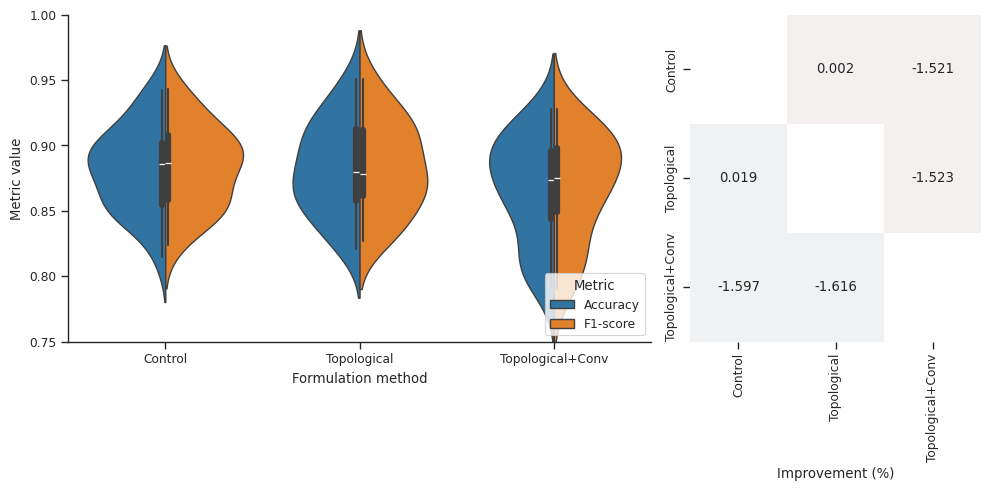

In [139]:
plot_performance(form_accs, form_f1s, form_categories, "Formulation method")